<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec11_%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 계열상관(serial correlation)

- 그 동안의 회귀분석은 횡단면(cross-section) 자료를 사용하였음

- 오차항 $i$, $j$ 하고 상관관계가 없다.

$$
Cov(e_i , e_j ) = 0
$$


- 시계열에서는 위의 가정이 잘 성립하지 않게 됨

$$
Cov(e_{t} , e_{t-1} ) \neq 0
$$

- 시계열은 어떤 특성이 있냐?
  - 시간 순서(temporal order)가 중요하다.
  - 종속성(dependency)을 갖게 됨

- 계열상관: 시계열의 시점간의 상관관계



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/usmacro.csv')
# df.tail()


- 미국 기준금리(federal funds rate)와 인플레이션(inflation)과의 관계

$$
fr_t = \beta_0 + \beta_1 inf_t + e_t
$$

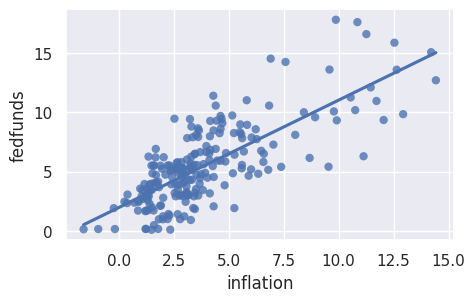

In [ ]:
# 위 관계를 산포도로 그려보시오.

sns.set_theme(style='darkgrid')

plt.figure(figsize=(5,3))
sns.regplot(y = 'fedfunds', x = 'inflation', data=df,
            marker='o', ci=False,
            scatter_kws={'edgecolor':'none'})
plt.show()

In [ ]:
# OLS 를 이용해서
# fr_t = \beta_0 + \beta_1 inf_t + e_t  모형 추정

import statsmodels.formula.api as smf

model = smf.ols(formula='fedfunds ~ inflation', data=df).fit()
# print(model.summary())

In [ ]:
# 잔차를 추출

df['ehat'] = model.resid

# date 변수를 날짜 형식으로 전환
df['date'] = pd.PeriodIndex(df['date'], freq = 'Q').to_timestamp()


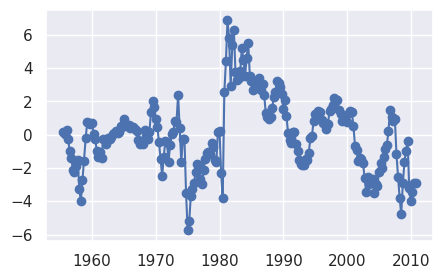

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(df['date'], df['ehat'], marker = 'o')
plt.show()

- 시계열에서는 위와 같은 계열상관이 흔하게 발견됨

- 오차항이 계열상관을 갖게 되면, OLS의 좋은 성질들이 사라짐
  - OLS는 최소한의 가정하에서 BLUE(best linear unbiased estimator)였었는데, 계열상관 하에서는 더이상 BLUE가 아님
  - 어느 방향으로 문제가 생겼는지 정확히 알 수가 없음

- 모형을 통해서 극복.
  - 오차항이 AR(1) (auto-corrleation, 1계 자기상관)

$$
y_{t} = \beta_0 + \beta_1 x_{t} + e_{t}
$$
$$
e_{t} = \rho e_{t-1} + v_t
$$

- 한 기간 뒤로 이동

$$
\rho  y_{t-1} = \rho  \beta_0 + \rho \beta_1 x_{t-1} + \rho e_{t-1}
$$

- 원래 식에서 위의 식을 빼면,

$$
y_{t} - \rho  y_{t-1} = \beta_0 - \rho  \beta_0 + \beta_1 x_{t} - \rho \beta_1 x_{t-1}  + e_{t} - \rho e_{t-1}
$$

$$
(y_{t} - \rho  y_{t-1}) = (\beta_0 - \rho  \beta_0 ) + \beta_1 (x_{t} - \rho  x_{t-1})   + (e_{t} - \rho e_{t-1} )
$$







- 사실은 아래와 같음
$$
(y_{t} - \rho  y_{t-1}) = (\beta_0 - \rho  \beta_0 ) + \beta_1 (x_{t} - \rho  x_{t-1})   + v_t
$$

-y와 x를 변형(transformation)을 해서 OLS를 하면 됨
  - 코크란-오커트(Cochrane-Orcutt 추정방법)